# Imports

In [1]:
import cv2
import xml.etree.ElementTree as ET
import glob
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
import zipfile
!pip3 install wget
import wget 

You are using pip version 8.1.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Download Wuzzuf RSS xml File

In [2]:
filename = wget.download("https://wuzzuf.net/feeds/all-jobs.xml")

In [3]:
tree = ET.parse(filename)
root = tree.getroot()

In [4]:
root.tag, root.attrib

('rss', {'version': '2.0'})

In [5]:
main_tags = np.unique([elem.tag for elem in root.iter()])

In [6]:
main_tags

array(['area', 'career_level', 'channel', 'company_logo', 'description',
       'experience', 'guid', 'image', 'industries', 'item', 'job_id',
       'language', 'lastBuildDate', 'link', 'pubDate', 'roles', 'rss',
       'salary', 'source', 'title', 'url', 'vacancies'], dtype='<U13')

In [7]:
filtered_tags = ['area', 'career_level', 'description', 'experience', 'industries', 'pubDate', 'roles', 'source', 'title']

In [8]:
#Create Dataframe
wuzzuf_df = pd.DataFrame(columns=filtered_tags)

In [9]:
tags_dic = {}
for tag in filtered_tags: 
    temp = []
    for item in root.iter(tag):
        temp.append(item.text)
    tags_dic[tag] = temp
    temp = []

In [10]:
capacity_lst =  [[x,tags_dic['area'].count(x)] for x in set(tags_dic['area'])]
sorted(capacity_lst,key=lambda capacity_lst: (capacity_lst[1]))

[['Mahta Alraml', 1],
 ['Agouza', 1],
 ['Akhmim', 1],
 ['Ameria', 1],
 ['Qena', 1],
 ['Azbakia', 1],
 ['khanka', 1],
 ['Ain Shams', 1],
 ['Manial', 1],
 ['Damanhour', 1],
 ['Assuit', 1],
 ['Ain Sokhna', 1],
 ['Smart Village', 1],
 ['Shorouk City', 1],
 ['Abbassia', 1],
 ['Tanta', 1],
 ['Moharam Bek', 1],
 ['Kafr Alzayat', 1],
 ['Bourj Alarab', 1],
 ['Nozha', 1],
 ['Abu Rawash', 1],
 ['Mansoura', 2],
 ['Hadayek Alahram', 2],
 ['Badr City', 2],
 ['Haram', 2],
 ['Smouha', 2],
 ['Shubra', 3],
 ['Sheikh Zayed', 3],
 ['San Stefano', 3],
 ['Sheraton', 5],
 ['10th of Ramadan City', 5],
 ['Obour City', 6],
 ['Downtown', 6],
 ['Zamalek', 7],
 ['Mokattam', 9],
 ['Mohandessin', 12],
 ['6th of October', 16],
 ['Dokki', 19],
 ['Heliopolis', 25],
 ['Nasr City', 29],
 ['New Cairo', 36],
 ['Maadi', 45],
 [None, 140]]

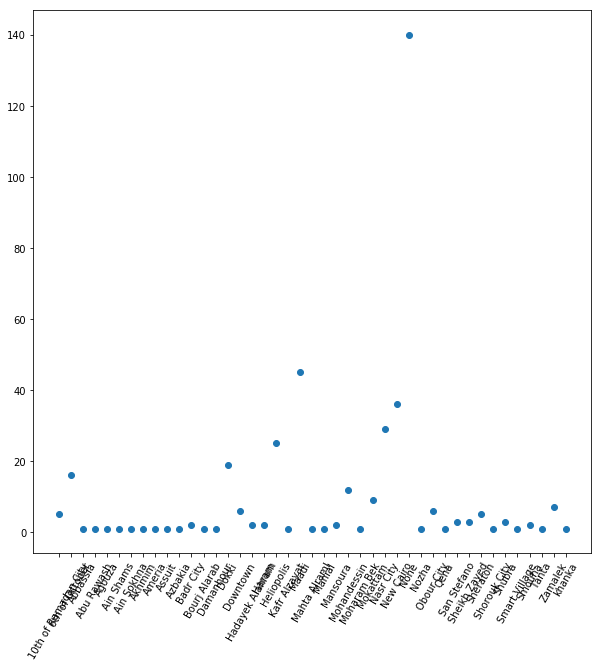

In [11]:
data = np.array(capacity_lst)
x, y = data.T
plt.rcParams['figure.figsize'] = [10, 10]
plt.setp(plt.xticks()[1], rotation=60)
plt.scatter(x,y)

In [37]:
df_city = pd.DataFrame(capacity_lst, columns=['City','Capacity'])
df_city.groupby(['City','Capacity']).count().plot.pie(subplots=True)

TypeError: Empty 'DataFrame': no numeric data to plot